# 시각화 모듈(라이브러리)

- Matplotlib
- Seaborn

In [1]:
import seaborn as sns # pylpot보다 하이레벨. 자유도가 낮고 편하다

In [2]:
# seaborn에서 제공하는 데이터셋

penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

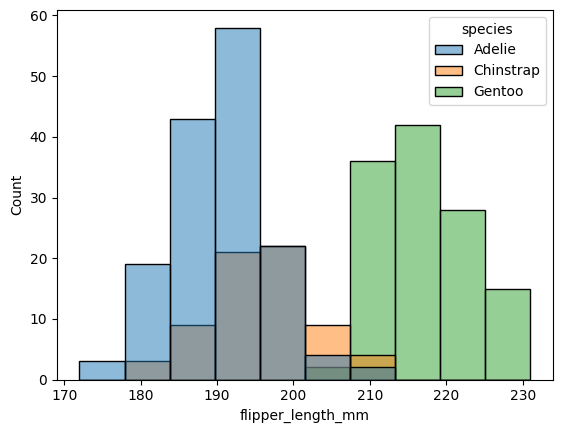

In [3]:
sns.histplot(data=penguins, x='flipper_length_mm', hue='species')

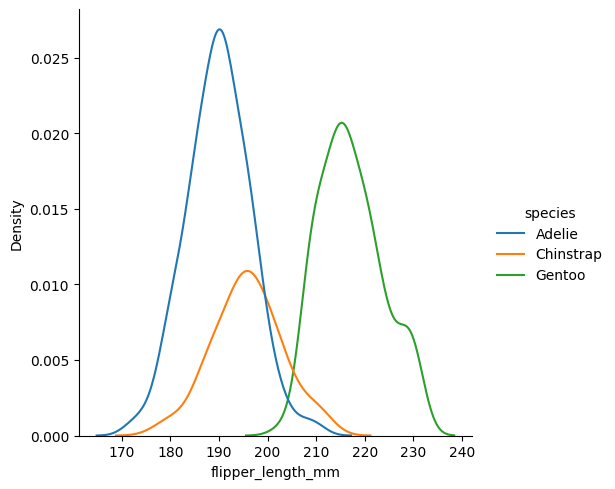

In [7]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', kind='kde') # kind는 분산을 뜻함 (kde: 커널밀도)

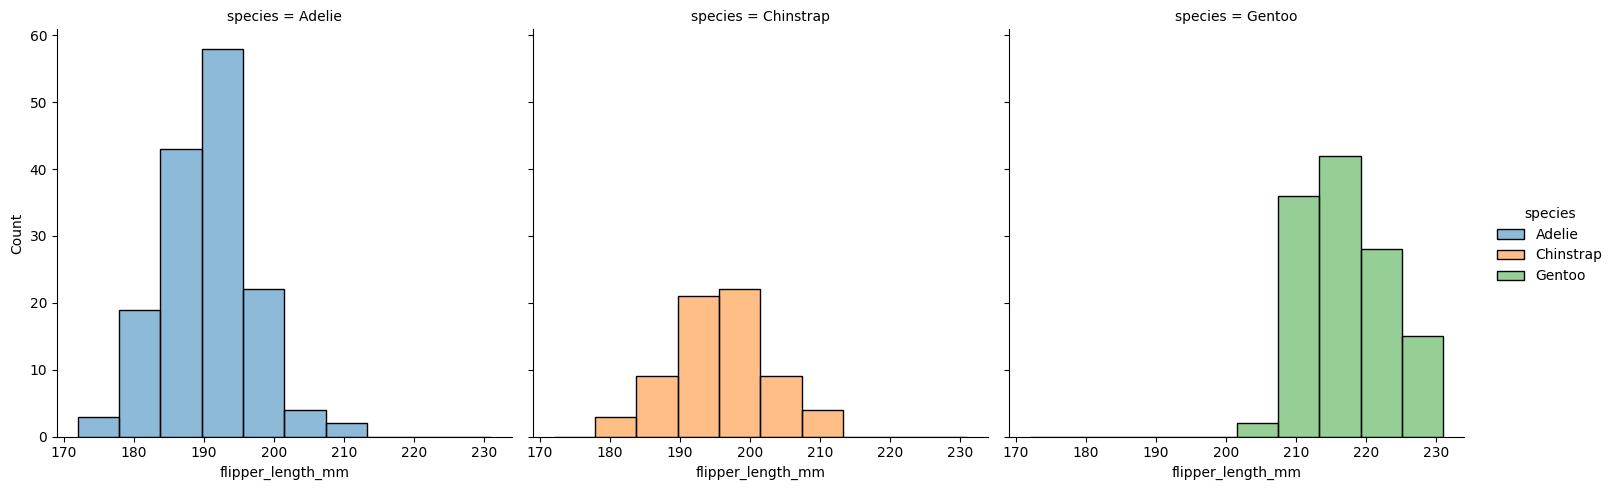

In [9]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', col='species')

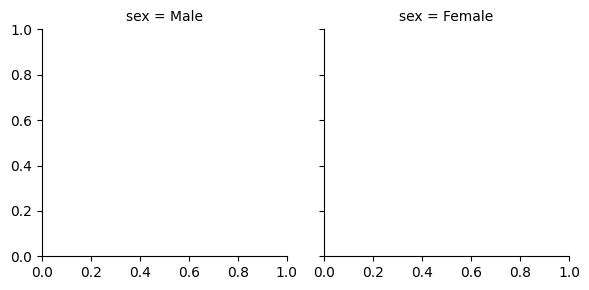

In [11]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(penguins, col='sex')


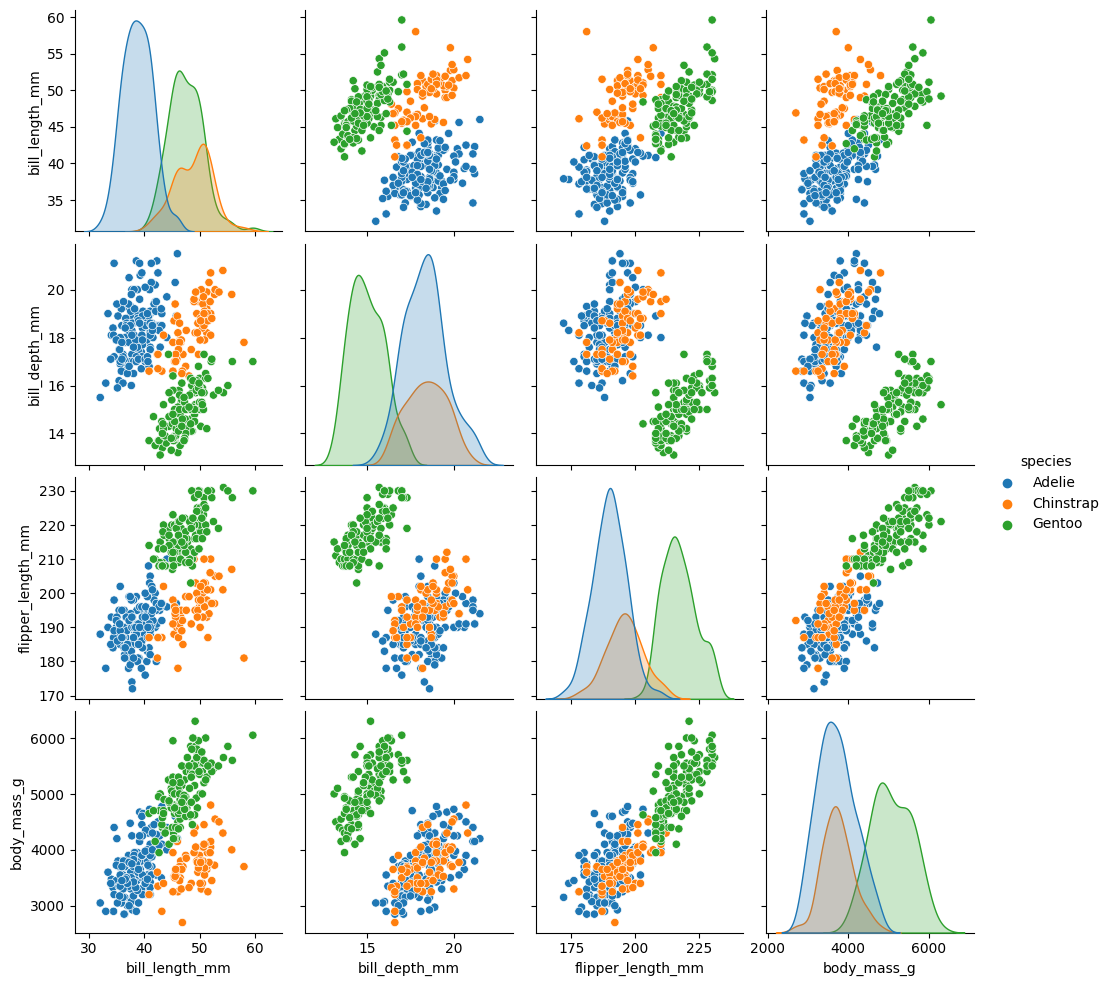

In [12]:
sns.pairplot(data=penguins, hue='species') # 상관관계에 대한 그래프 -> 변수들 간의 상관관계를 한 번에 보여줌
# 상관관계: 수치형 데이터만

<ipython-input-15-69bdf224a75c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue = sns.load_dataset('glue').pivot('Model','Task','Score')


<Axes: xlabel='Task', ylabel='Model'>

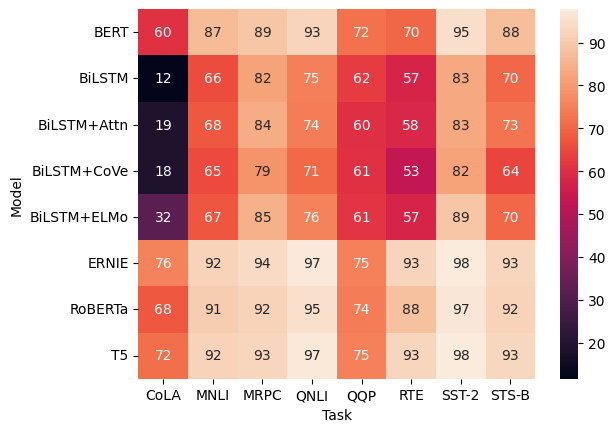

In [15]:
glue = sns.load_dataset('glue').pivot('Model','Task','Score')
sns.heatmap(glue, annot=True)

In [ ]:
# 변수 간 상관관계 -> pairplot, heatmap

# 상관관계

- 두 변수 간의 선형 관계(비례, 반비례)를 설명
- 상관관계에 있다고 해서 인과관계를 가지는 것은 아니다
- 상관관계는 -1 ~ 1 의 값을 갖는다. 양 끝 값에 가까울수록 상관성이 높다


In [16]:
# 상관관계 그래프를 그리기는 쉬움 -> 왜 그리는지, 어떻게 해석할 지가 중요함

# 불러오고, 살펴보고, 전처리 > 상관관계 추가

# IBM Attrition 데이터

- IBM에서 만든 데이터(가상 데이터)
- 여러 변수들(연봉, 직업만족도 ...)  -> 퇴사
- 여러 변수들 중 어떤게 퇴사와 관련있을까
- 퇴사 했는지 안했는지 판별할 수 있게하는 데이터셋



In [17]:
# WA_Fn-UseC_-HR-Employee-Attrition 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition_2.csv')

## 데이터 전처리

In [28]:
df = df[:1000] # 데이터가 너무 커서 잘라줌
df.shape

(1000, 35)

In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [30]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
995,43,No,Travel_Rarely,930,Research & Development,6,3,Medical,1,1402,...,1,80,0,20,3,1,20,7,1,8
996,27,No,Travel_Rarely,205,Sales,10,3,Marketing,1,1403,...,4,80,0,6,3,3,6,2,4,4
997,27,Yes,Travel_Rarely,135,Research & Development,17,4,Life Sciences,1,1405,...,4,80,0,8,2,3,8,2,7,7
998,26,No,Travel_Rarely,683,Research & Development,2,1,Medical,1,1407,...,4,80,0,5,2,3,4,3,1,1
999,42,No,Travel_Rarely,1147,Human Resources,10,3,Human Resources,1,1408,...,3,80,1,21,5,3,20,7,0,9


In [31]:
df.info() # 데이터 타입 -> int, float / object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Attrition                 1000 non-null   object
 2   BusinessTravel            1000 non-null   object
 3   DailyRate                 1000 non-null   int64 
 4   Department                1000 non-null   object
 5   DistanceFromHome          1000 non-null   int64 
 6   Education                 1000 non-null   int64 
 7   EducationField            1000 non-null   object
 8   EmployeeCount             1000 non-null   int64 
 9   EmployeeNumber            1000 non-null   int64 
 10  EnvironmentSatisfaction   1000 non-null   int64 
 11  Gender                    1000 non-null   object
 12  HourlyRate                1000 non-null   int64 
 13  JobInvolvement            1000 non-null   int64 
 14  JobLevel                 

In [32]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# object(string) -> 내가 어떤 형태로 변환을 해야하는가?
# 머신러닝이나 통계 툴을 쓸때 object를 인식하지 못하는 경우가 많음
# yes/no 와 같은 object -> one-hot encoding(0, 1)
# labelencoding(0, 1, 2 ,3 ...) 사용

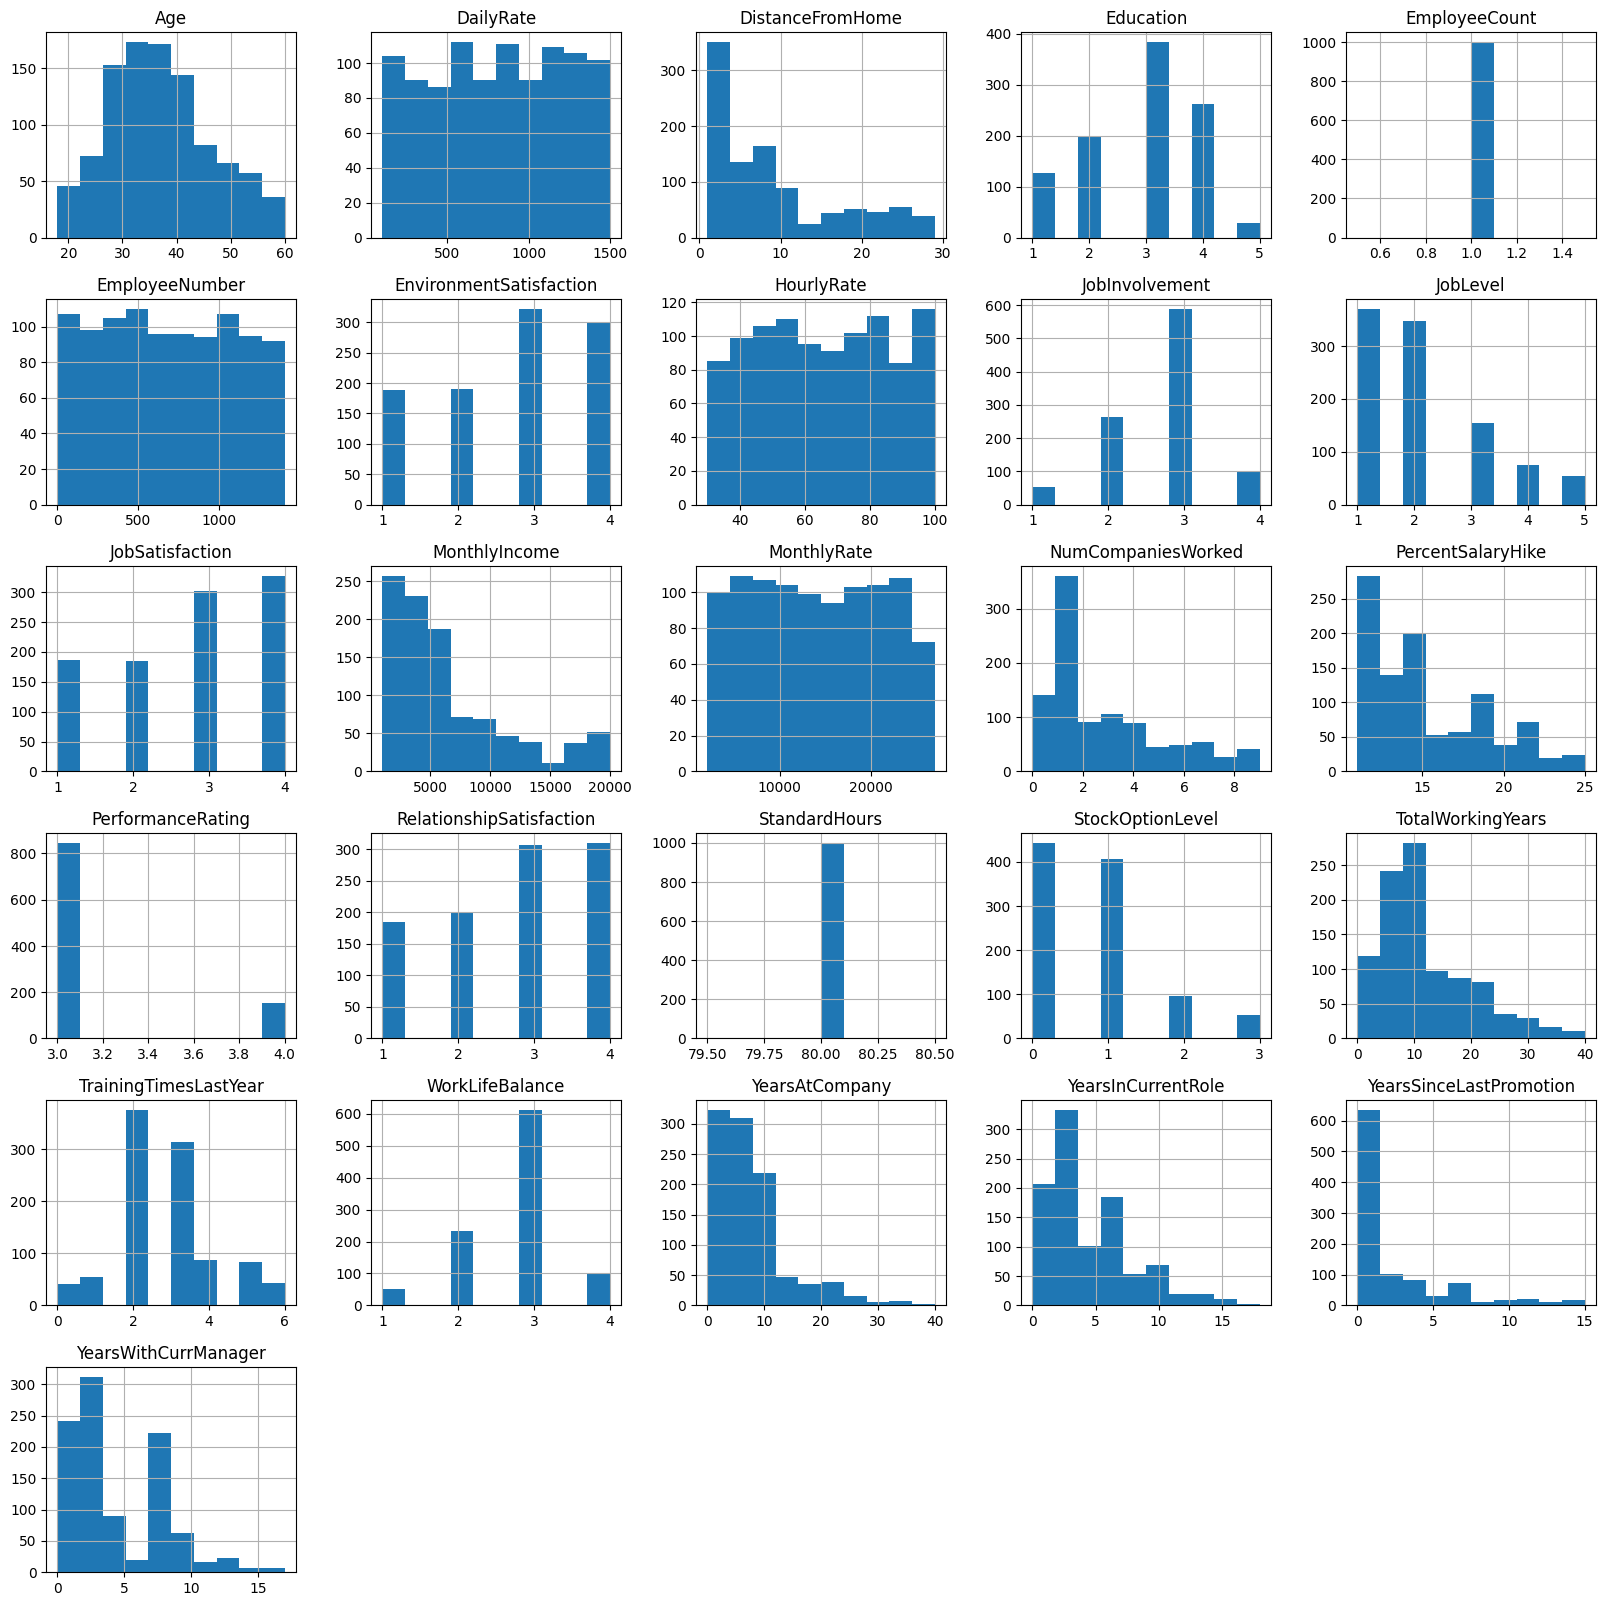

In [33]:
# histplot

df.hist(figsize=(20,20))
plt.show() # 전체 데이터 히스토그램 -> EmployeeCount, StandardHours가 이상함

In [38]:
# Attrition 퇴사인지 아닌지
df['Attrition'].value_counts()

# Attrition pie graph

No     833
Yes    167
Name: Attrition, dtype: int64

In [39]:
# 상관관계 파악하기

corr = df.corr()
corr.shape

<ipython-input-39-b682000dd119>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


(26, 26)

<Axes: >

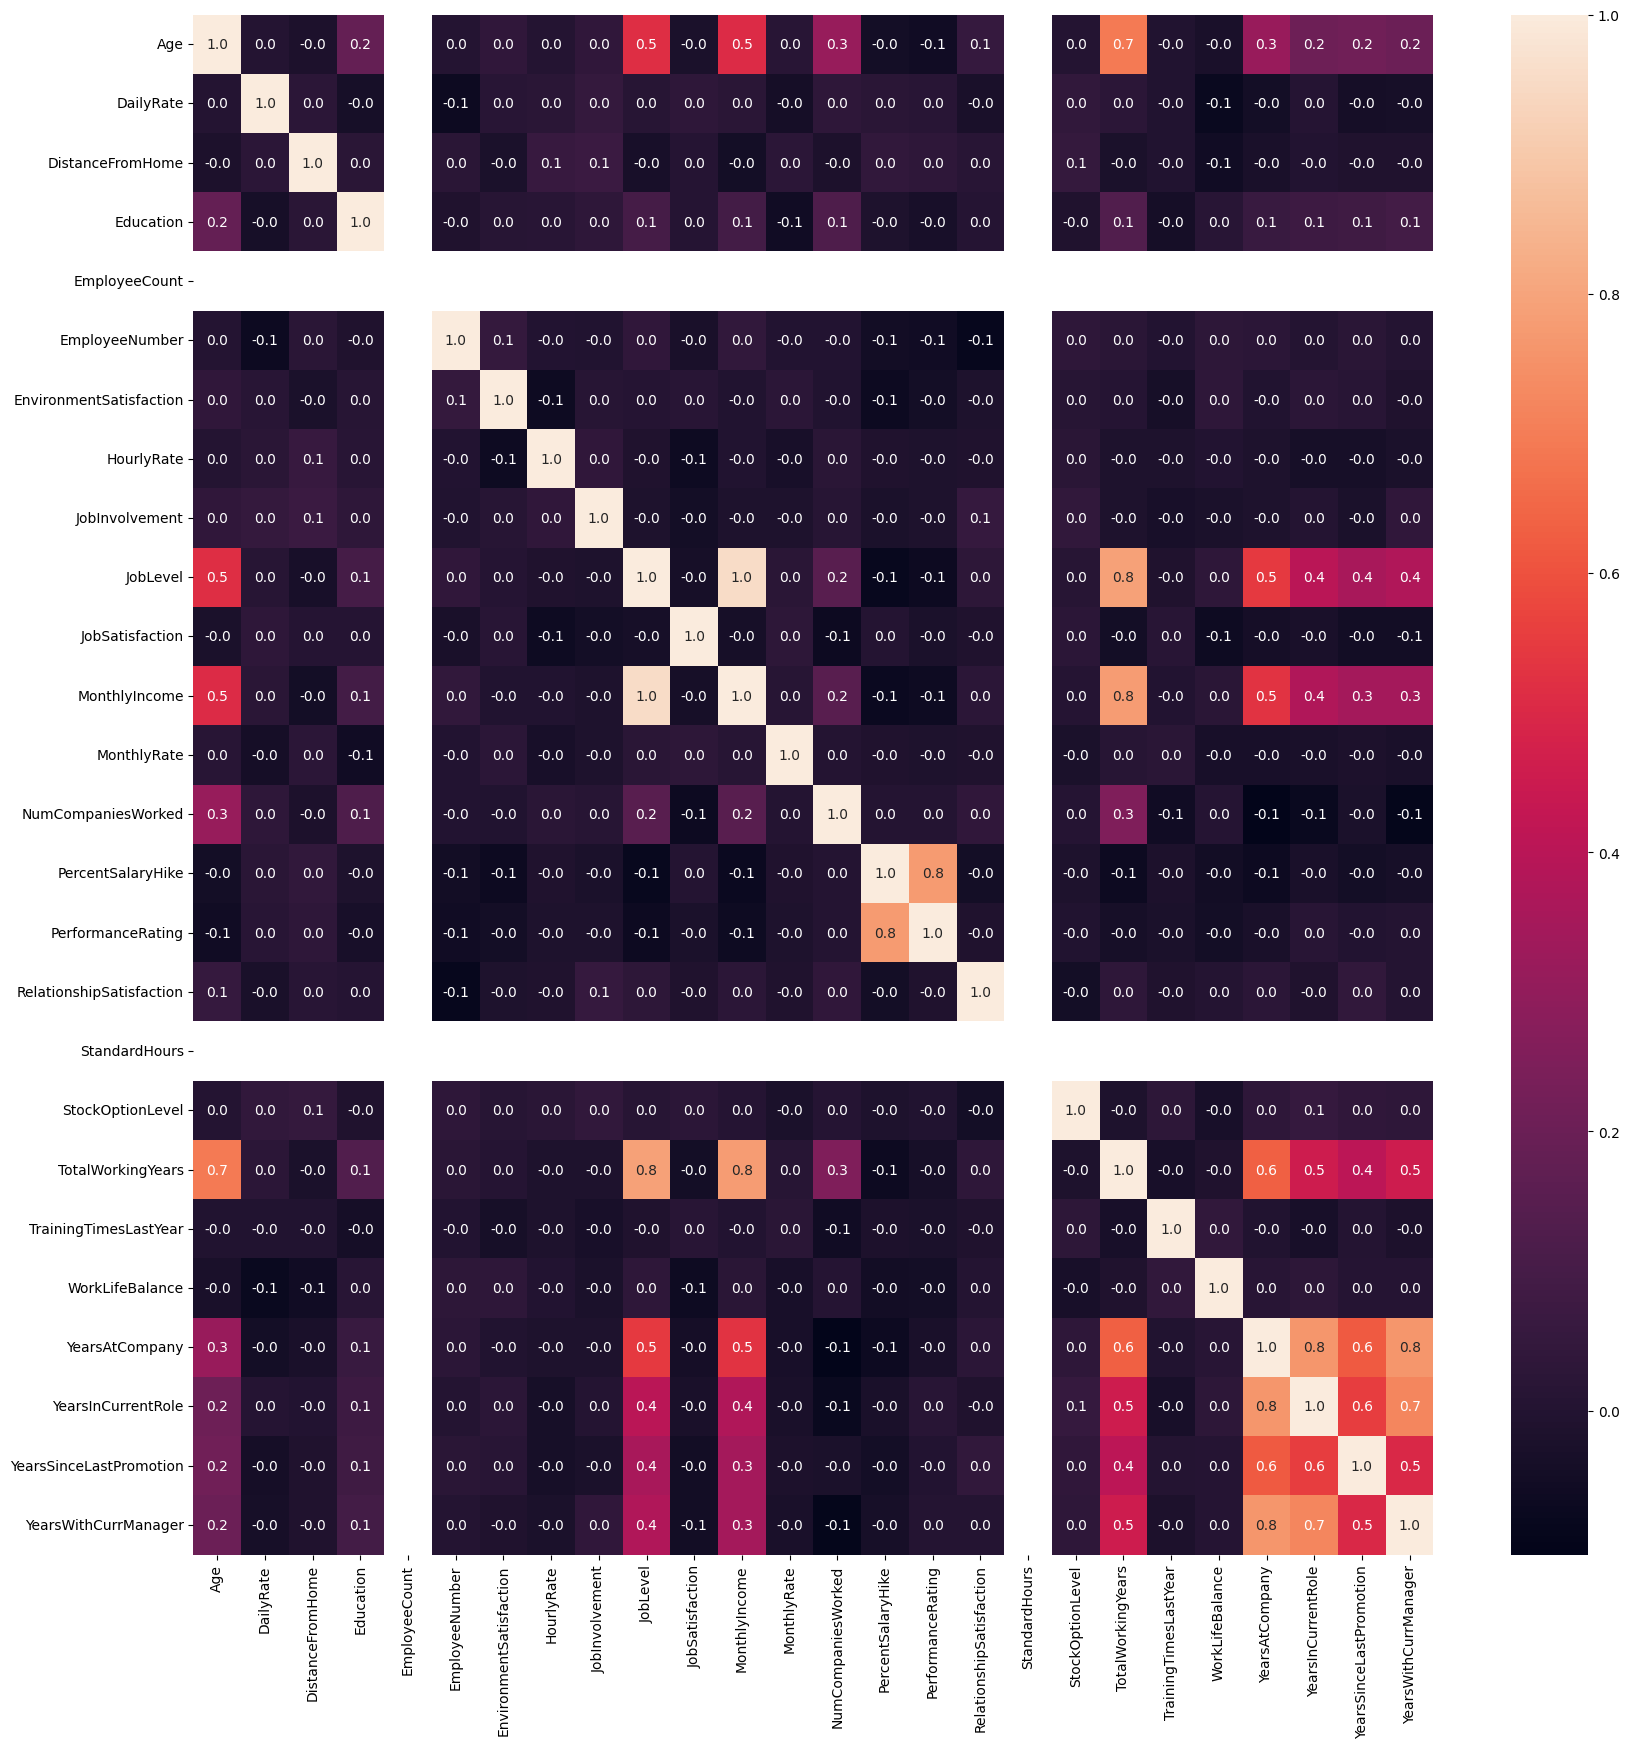

In [42]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, fmt='.1f', annot=True) # 문자로된 컬럼들이 빠져있다. Attrition
# fmt='.1f' : 소숫점 첫번째 값까지
# -1 , 1 양 끝 값에 가까울수록 상관관계가 높다
# 0.3 < corr : 상관관계가 있다.
# 0.7 < corr : 상관관계가 높다.
# PercentSalaryHike - PerformanceRating -> 0.8
# TotalWorkingYears - Age -> 0.7
# TotalWorkingYears - JopLevel -> 0.8
# YearsWithCurrManager - YearsWithCompany -> 0.8
# YearsWithCurrManager - YearsCurrentRole -> 0.7

In [ ]:
# EmployeeCount

# StandardHours

In [43]:
df['EmployeeCount'].head()

0    1
1    1
2    1
3    1
4    1
Name: EmployeeCount, dtype: int64

In [44]:
df['StandardHours'].head()

0    80
1    80
2    80
3    80
4    80
Name: StandardHours, dtype: int64

In [48]:
# 필요없는 데이터 드랍

# EmplyeeCount
df = df.drop('EmployeeCount', axis=1)

# StandardHours
df = df.drop('StandardHours', axis=1)

In [50]:
df.shape

(1000, 33)

## 전체 직원 중 퇴사 인원 비율

In [ ]:
# 상관관계가 높은 변수들 위주로 데이터 탐색하기

# PercentSalaryHike - PerformanceRating -> 0.8
# TotalWorkingYears - Age -> 0.7
# TotalWorkingYears - JopLevel -> 0.8
# YearsWithCurrManager - YearsWithCompany -> 0.8
# YearsWithCurrManager - YearsCurrentRole -> 0.7

In [66]:
# 전체 직원 중 퇴사 인원 비율

attrition  = df['Attrition'][df['Attrition'] == 'Yes'].count()
total = df['Attrition'].count()
print(attrition)
print(total)

167
1000


In [69]:
attrition_p = (attrition / total) * 100
attrition_p
# 전체 직원 중 16.7% 가 퇴사를 했다.

16.7

([<matplotlib.patches.Wedge at 0x7f0e937b6da0>,
 [Text(0.9520514449129607, 0.5509973196297274, 'Attrition'),
  Text(-0.9520514191189136, -0.5509973641984715, 'Working')],
 [Text(0.5193007881343421, 0.30054399252530584, '16.7%'),
  Text(-0.5193007740648619, -0.30054401683552984, '83.3%')])

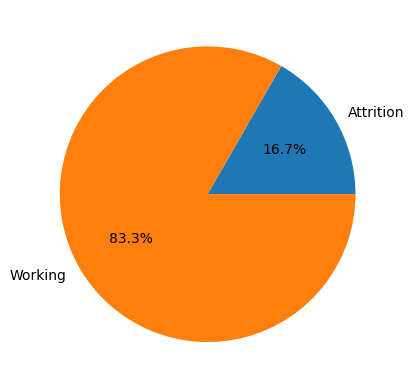

In [76]:
# pie graph

label = ['Attrition', 'Working']
attrition_p = (attrition / total) * 100
n_attrition = 100 - attrition_p

plt.pie([attrition_p, n_attrition], labels =label, autopct='%.1f%%')

## 직업 레벨에 따른 퇴사 비율

In [77]:
# 직업 레벨에 따른 퇴사 비율
df['JobLevel'].head()

0    2
1    2
2    1
3    1
4    1
Name: JobLevel, dtype: int64

In [79]:
df['JobLevel'].value_counts() # unique 값의 갯수
# Entry, Mid, Senior, Lead, Excutive

1    370
2    347
3    155
4     74
5     54
Name: JobLevel, dtype: int64

In [85]:
# padas Catogorical
df['JobLevel'] = pd.Categorical(df['JobLevel']).rename_categories(['Entry', 'Mid', 'Senior', 'Lead', 'Excutive'])

df['JobLevel'].value_counts()

Entry       370
Mid         347
Senior      155
Lead         74
Excutive     54
Name: JobLevel, dtype: int64

## 퇴사 여부와 직업 레벨의 관계

In [94]:
# Attrition이 Yes인 사람중 Joblevel
attrition_joblevel = df['JobLevel'][df['Attrition'] == 'Yes'].value_counts()

In [97]:
attrition_joblevel.index

CategoricalIndex(['Entry', 'Mid', 'Senior', 'Excutive', 'Lead'], categories=['Entry', 'Mid', 'Senior', 'Lead', 'Excutive'], ordered=False, dtype='category')

In [99]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 45.8 MB/s eta 0:00:00


In [100]:
import koreanize_matplotlib

<BarContainer object of 5 artists>

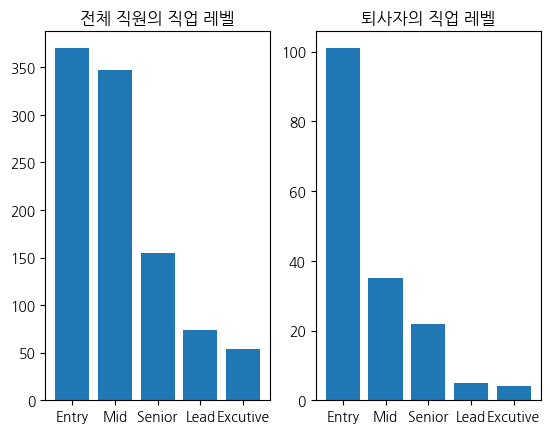

In [103]:
# df['JobLevel'] bar
# df['JobLevel'].unique() # x
# df['JobLevel'].value_counts() # y

# 원래 전체 직원 수 중 JobLevel 분포
plt.subplot(1,2,1)
plt.title('전체 직원의 직업 레벨')
plt.bar(df['JobLevel'].value_counts().index, df['JobLevel'].value_counts())

# 퇴사자 중 JobLevel 분포
plt.subplot(1,2,2)
plt.title('퇴사자의 직업 레벨')
plt.bar(df['JobLevel'].value_counts().index, attrition_joblevel)

## 나이와 퇴사의 관계

In [106]:
# 나이에 따른 퇴사 비율
df['Age'].value_counts()

35    51
34    49
30    45
36    44
31    42
33    41
32    41
29    41
37    39
38    37
27    35
40    35
42    33
28    32
26    29
41    29
45    27
39    24
50    24
43    23
46    22
44    21
25    20
51    18
24    16
52    16
55    15
53    14
49    12
47    12
48    12
22    12
54    12
58    10
59    10
21    10
20     9
19     9
56     9
23     7
18     6
60     4
57     3
Name: Age, dtype: int64

In [107]:
df['Age'].unique()


array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [110]:
df['Age'].describe()

count    1000.000000
mean       36.992000
std         9.417783
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

### 나이를 구간 별로 나누기

In [122]:
# 나이대 구간 별로 나누기
# 10대 ~ 60대

# 원하는 형식에 맞게 값을 넣어준다
df['Age_10'] = df['Age'][(df['Age'] >= 10) & (df['Age'] < 20)]
df['Age_20'] = df['Age'][(df['Age'] >= 20) & (df['Age'] < 30)]
df['Age_30'] = df['Age'][(df['Age'] >= 30) & (df['Age'] < 40)]
df['Age_40'] = df['Age'][(df['Age'] >= 40) & (df['Age'] < 50)]
df['Age_50'] = df['Age'][(df['Age'] >= 50) & (df['Age'] < 60)]
df['Age_60'] = df['Age'][(df['Age'] >= 60) & (df['Age'] < 70)]

In [123]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_10,Age_20,Age_30,Age_40,Age_50,Age_60
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,6,4,0,5,NaN,NaN,NaN,41.0,NaN,NaN
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,10,7,1,7,NaN,NaN,NaN,49.0,NaN,NaN
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,0,0,0,0,NaN,NaN,37.0,NaN,NaN,NaN
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,8,7,3,0,NaN,NaN,33.0,NaN,NaN,NaN
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,2,2,2,2,NaN,27.0,NaN,NaN,NaN,NaN


In [127]:
# pandas 합치기 -> 병합: concate, merge
# join -> inner(교집합), outer(합집합), left(왼쪽 기준), right(오른쪽 기준)
# df['Age_10'] : 시리즈 형태(컬럼), 인덱스가 같음
# concat(outer)

ages = [df['Age_10'],df['Age_20'],df['Age_30'],df['Age_40'],df['Age_50'],df['Age_60']]
age_cols = pd.concat(ages, axis=1)

In [128]:
age_cols

,Age_10,Age_20,Age_30,Age_40,Age_50,Age_60
0,NaN,NaN,NaN,41.0,NaN,NaN
1,NaN,NaN,NaN,49.0,NaN,NaN
2,NaN,NaN,37.0,NaN,NaN,NaN
3,NaN,NaN,33.0,NaN,NaN,NaN
4,NaN,27.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
995,NaN,NaN,NaN,43.0,NaN,NaN
996,NaN,27.0,NaN,NaN,NaN,NaN
997,NaN,27.0,NaN,NaN,NaN,NaN
998,NaN,26.0,NaN,NaN,NaN,NaN


In [131]:
# 조건에 따라서 값을 넣어줌
# 컬럼, 행으로 값을 넣어주면 됨
# 행기준으로 순회하면서 값이 있을 새로운 컬럼에 넣어준다

# numpy where
# np.where(조건, 참일 때 넣어줄 값, 거짓말 일 때 넣어줄 값

# where 조건을 이용해서 변수 바꿔가면서 각 연령대 데이터를 순회한다.
col_name = list(age_cols.columns)
for i in col_name:
  df['Ages'] = np.where(df[i].isnull() == False, df[i], 0) 


In [141]:
# loc
# cities = region.loc[:, region.columns[:-1]]
# df.loc['label', 'col']
'''
df['Age_10'][df.loc[:,'Age_10'].isnull() == False] # series
df['Age_20'][df.loc[:,'Age_20'].isnull() == False] # series
df['Age_30'][df.loc[:,'Age_30'].isnull() == False] # series
df['Age_40'][df.loc[:,'Age_40'].isnull() == False] # series
df['Age_50'][df.loc[:,'Age_50'].isnull() == False] # series
df['Age_60'][df.loc[:,'Age_60'].isnull() == False] # series
'''
col_dic = {
    'Age_10': 10,
    'Age_20': 20,
    'Age_30': 30
}


for i, j in col_dic:
  np.where(df[i].isnull() == False, j, 0) # where 조건을 이용해서 변수 바꿔가면서 각 연령대 데이터를 순회한다.

 

411    60.0
427    60.0
536    60.0
879    60.0
Name: Age_60, dtype: float64

In [ ]:
'''
행에 다른 값을 찾아갈 때

where
np.where(조건(반복되는 부분), 참일 때 넣어줄 값, 거짓일 때 넣어줄 값)
-> for문을 이용해서 변하는 변수들을 바꿔줌

loc
df.loc['label(인덱스)'(, col(컬럼명))]
-> for문을 이용해서 변하는 변수들을 바꿔줌

In [161]:
# 데이터 확인 (null값이 아닌 것)
# age_10: [df.loc[:,'Age_10'].isnull() == False]


age_10 = df['Age'][df.loc[:,'Age_10'].isnull() == False] # 10대 고유의 인덱스 값
age_20 = df['Age'][df.loc[:,'Age_20'].isnull() == False] # 20대 고유의 인덱스 값
age_30 = df['Age'][df.loc[:,'Age_30'].isnull() == False] # 30대 고유의 인덱스 값
age_40 = df['Age'][df.loc[:,'Age_40'].isnull() == False] # 40대 고유의 인덱스 값
age_50 = df['Age'][df.loc[:,'Age_50'].isnull() == False] # 50대 고유의 인덱스 값
age_60 = df['Age'][df.loc[:,'Age_60'].isnull() == False] # 60대 고유의 인덱스 값

In [166]:
# 10대 인덱스
a_10 = list(age_10.index)

# df.loc[a_10[0]]['Ages'] = '10대'
# df.loc[a_10[0], 'Ages'] = '10대'
print(df.loc[a_10[0], 'Ages'])
df.loc[a_10, 'Ages'] = '10대'

10대


In [170]:
# 20대 인덱스
a_20  = list(age_20.index)
print(df.loc[a_20[0], 'Ages'])
df.loc[a_20, 'Ages'] = '20대'

20


In [175]:
a_30 = list(age_30.index)
a_40 = list(age_40.index)
a_50 = list(age_50.index)
a_60 = list(age_60.index)

df.loc[a_30, 'Ages'] = '30대'
df.loc[a_40, 'Ages'] = '40대'
df.loc[a_50, 'Ages'] = '50대'
df.loc[a_60, 'Ages'] = '60대'

In [182]:
print(df['Ages'].value_counts())

30대    413
40대    226
20대    211
50대    131
10대     15
60대      4
Name: Ages, dtype: int64


<BarContainer object of 6 artists>

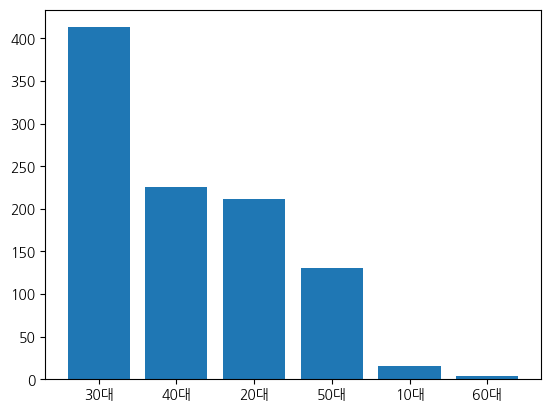

In [184]:
# bar graph -> 전체 연령에 대한 그래프
plt.bar(df['Ages'].value_counts().index, df['Ages'].value_counts())

In [185]:
# 퇴사 그래프
attrition_age = df['Ages'][df['Attrition']=='Yes']

In [186]:
attrition_age.value_counts()

30대    60
20대    57
40대    24
50대    17
10대     9
Name: Ages, dtype: int64

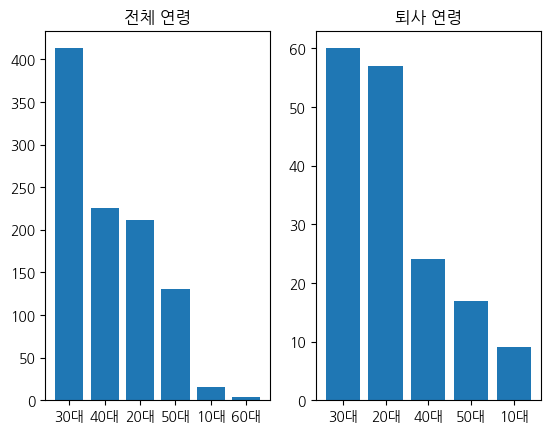

In [188]:
plt.subplot(1,2,1)
plt.title('전체 연령')
plt.bar(df['Ages'].value_counts().index, df['Ages'].value_counts())

plt.subplot(1,2,2)
plt.title('퇴사 연령')
plt.bar(attrition_age.value_counts().index, attrition_age.value_counts())

plt.show()

## 직업 레벨과 연봉의 관계

In [189]:
# 직급에 따른 연봉

# PercentSalaryHike - PerformanceRating -> 0.8
# TotalWorkingYears - Age -> 0.7
# TotalWorkingYears - JopLevel -> 0.8
# YearsWithCurrManager - YearsWithCompany -> 0.8
# YearsWithCurrManager - YearsCurrentRole -> 0.7

df.columns
# 직급: JobLevel
# 연봉 : MonthlyIncome * 12 

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Age_10', 'Age_20', 'Age_30', 'Age_40', 'Age_50', 'Age_60', 'Ages'],
      dtype='object')

In [190]:
df['JobLevel'].head()

0      Mid
1      Mid
2    Entry
3    Entry
4    Entry
Name: JobLevel, dtype: category
Categories (5, object): ['Entry', 'Mid', 'Senior', 'Lead', 'Excutive']

In [194]:
df['annual_s'] = df['MonthlyIncome'] * 12
print(df['annual_s'].head())

0    71916
1    61560
2    25080
3    34908
4    41616
Name: annual_s, dtype: int64


In [197]:
# 직급별 연봉
# 기준이되는 데이터, 적용할 데이터 -> groupby
# groupby('기준이 되는 데이터')['컬럼'].함수() -> mean

job_annual_salary = df.groupby('JobLevel')['annual_s'].mean()

In [198]:
job_annual_salary

JobLevel
Entry        33264.681081
Mid          65457.475504
Senior      118516.877419
Lead        185649.081081
Excutive    229540.888889
Name: annual_s, dtype: float64

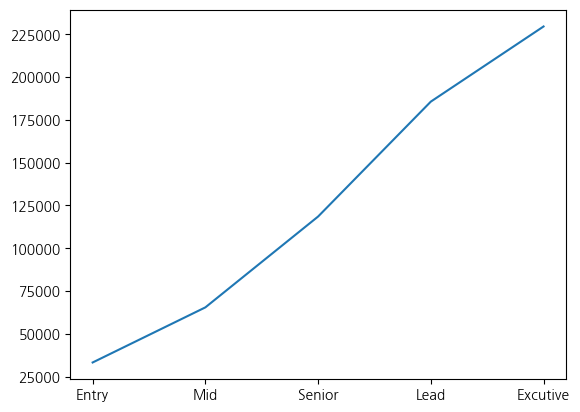

In [199]:
# plot

plt.plot(job_annual_salary)
plt.show()

# 적절하지 않은 그래프
# 연속된 값이 아니기 때문에 선 그래프가 적절하지 않음

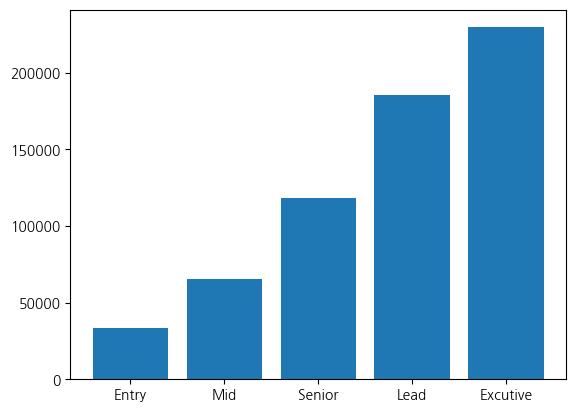

In [201]:
# bar 

plt.bar(job_annual_salary.index, job_annual_salary)
plt.show()

<Axes: xlabel='JobLevel', ylabel='annual_s'>

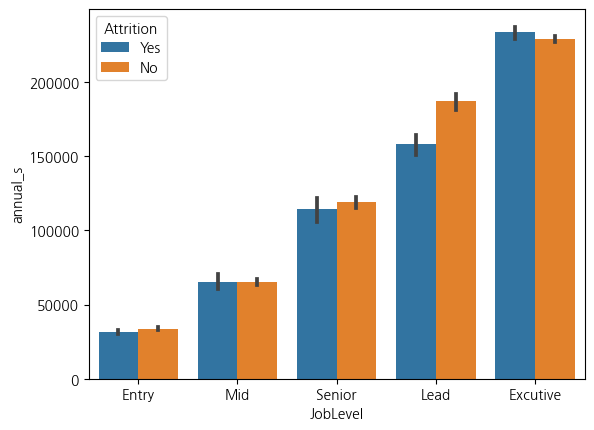

In [204]:
# seaborn 사용하여 bar graph 그리기

sns.barplot(data=df, x='JobLevel', y='annual_s', hue='Attrition')

## 성별과 퇴사의 관계

In [207]:
# 성별에 따른 퇴사 비율 (퇴사자 남여 성비)
# Gender

df['Gender'].value_counts()

Male      584
Female    416
Name: Gender, dtype: int64

In [211]:
# 퇴사자를 먼저 뽑고
# 성별대로 분리

attrition_g = df['Gender'][df['Attrition'] == 'Yes']

Male      103
Female     64
Name: Gender, dtype: int64

In [219]:
# one-hot encoding: 텍스트(범주형) -> 숫자
# 남/녀, 정상/비정상, 오전/오후 ...
# 0/1
# Gender Male(0), Female(1)

# 1. 판다스에서 제공하는 get_dummies
# pd.get_dummies(df, columns=[])
oh_gender = pd.get_dummies(df, columns=['Gender'])
oh_gender

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,Age_10,Age_20,Age_30,Age_40,Age_50,Age_60,Ages,annual_s,Gender_Female,Gender_Male
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,NaN,NaN,NaN,41.0,NaN,NaN,40대,71916,1,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,NaN,NaN,NaN,49.0,NaN,NaN,40대,61560,0,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,NaN,NaN,37.0,NaN,NaN,NaN,30대,25080,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,NaN,NaN,33.0,NaN,NaN,NaN,30대,34908,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,NaN,27.0,NaN,NaN,NaN,NaN,20대,41616,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,43,No,Travel_Rarely,930,Research & Development,6,3,Medical,1402,1,...,NaN,NaN,NaN,43.0,NaN,NaN,40대,48972,1,0
996,27,No,Travel_Rarely,205,Sales,10,3,Marketing,1403,4,...,NaN,27.0,NaN,NaN,NaN,NaN,20대,69228,1,0
997,27,Yes,Travel_Rarely,135,Research & Development,17,4,Life Sciences,1405,4,...,NaN,27.0,NaN,NaN,NaN,NaN,20대,28728,1,0
998,26,No,Travel_Rarely,683,Research & Development,2,1,Medical,1407,1,...,NaN,26.0,NaN,NaN,NaN,NaN,20대,46848,0,1
